In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from pandas_profiling import ProfileReport
from IPython.core.interactiveshell import InteractiveShell

# для удобства,вывод всех out после ячейки JB , а не только последний
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.xls')
stud

numeric_cols = []  # содержит имена числовых столбцов заполняется  ф-ией col_consider
categorial_cols = []  # содержит имена нечисловых столбцов заполняется  ф-ией col_consider

## Осмотр данных   "stud_math.xls"

In [30]:
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


**Присутвуют NaN значения!**

In [31]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

- Максимальное кол-во наблюдений: 395 

В большинстве столбцов есть пропуски записей. Полность заполнены только первые 3 переменных **school, sex, age**.

- Числовых(количественных) столбцов : 13 
- Номинативных: 17  

Так как столбцов много, поделим их на 2 категории, которые будем анализировать определенным образом.

### Пользовательские функции

In [32]:
# выделяем наименования числовых и номинативных столбцов датафрейма

def col_consider(df):
    global numeric_cols
    global categorial_cols

    numeric_cols = []
    categorial_cols = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            numeric_cols.append(col)
        else:
            categorial_cols.append(col)


# разделяем
col_consider(stud)

In [111]:
# проверка на выбросы на вход col имя столбца , df - имя датафрейма

def check_outs(col, df):

    median = df[col].median()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)

    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

    df[col].loc[df[col].between(
        perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=5, label='IQR')

    df[col].loc[(df[col] > perc75 + 1.5*IQR) | (df[col] < perc25 - 1.5*IQR)].hist(
        alpha=0.5, bins=5, range=(df[col].min(), df[col].max()), label='Выбросы')

    plt.legend()

In [34]:
# преобразование пропусков и NaN -> None

def fix_values(val):
    val = str(val)
    str(val).strip()

    if pd.isnull(val):
        return None
    elif val in ['NaN', 'nan']:  # если вдруг это не пропуск.
        return None
    else:
        return val

## План выполения:
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [35]:
# общий осмотр данных
#profile = ProfileReport(stud)
#profile

## Пройдемся по стоблцам.

In [36]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

## school

In [37]:
pd.DataFrame(stud.school.value_counts())


,school
GP,349
MS,46


##### Представлены только 2 школы.   
Если представлены только 2 школы,то они, предположительно,  расположены в одной стране.Еслибы рассматривались школы разных стран, то их должно было быть больше.(возможно это наблюдение будет полезно при дальнейшем анализе).  Пропусков нет.

## sex

In [38]:
stud.sex.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

In [39]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


##### В современном мире  уже больше чем 2 пола, но в нашем представлены только два :) Пропусков нет.

# age

In [40]:
stud.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [41]:
pd.DataFrame(stud.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


##### Соответсвует заявленному требованию анкеты -  "возраст ученика (от 15 до 22)"

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


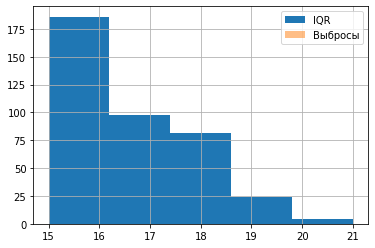

In [112]:
check_outs('age',stud)

In [43]:
stud[stud.age == 22]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


статистический выброс - одно наблюдение где ученику 22 года, но даже учитывая то, что это не противоречит анкете, исключаем это наблюдение. 

In [44]:
stud = stud[stud.age != 22]

# address

In [46]:
stud.address.describe()
pd.DataFrame(stud.address.value_counts())

count     377
unique      2
top         U
freq      294
Name: address, dtype: object

,address
U,294
R,83


##### Соответсвует заявленному требованию анкеты -  "'U' - городской, 'R' - за городом". Есть пропуски.Заполнить нет возможности.

# famsize

In [53]:
stud.famsize.describe()
pd.DataFrame(stud.famsize.value_counts())


count     367
unique      2
top       GT3
freq      260
Name: famsize, dtype: object

,famsize
GT3,260
LE3,107


##### Соответсвует заявленному требованию анкеты -  
"'LE3' <= 3, 'GT3' >3"  

Есть пропуски.Заполнить нет возможности.

# Pstatus

In [55]:
stud.Pstatus.describe()
pd.DataFrame(stud.Pstatus.value_counts())


count     349
unique      2
top         T
freq      313
Name: Pstatus, dtype: object

,Pstatus
T,313
A,36


##### Соответсвует заявленному требованию анкеты -  
'T' - живут вместе 'A' - раздельно  
Есть пропуски. Заполнить нет возможности.

# Medu и Fedu

In [59]:
stud.Medu.describe()
stud.Fedu.describe()

pd.DataFrame(stud.Medu.value_counts())
pd.DataFrame(stud.Fedu.value_counts())

count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

count    370.000000
mean       2.618919
std        2.230163
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

,Medu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


##### Соответсвует заявленному требованию анкеты -  
"0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее"
Есть пропуски.Заполнить нет возможности.

Есть аномалия в виде значения 40.0. Явно при заполнении сыграл человеческий фактор. Исправляем на 4.0

In [86]:
stud[stud.Fedu == 40.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


# Mjob и Fjob

In [81]:
stud.Mjob.describe()
stud.Fjob.describe()

pd.DataFrame(stud.Mjob.value_counts())
pd.DataFrame(stud.Fjob.value_counts())

count       375
unique        5
top       other
freq        133
Name: Mjob, dtype: object

count       358
unique        5
top       other
freq        197
Name: Fjob, dtype: object

,Mjob
other,133
services,97
at_home,58
teacher,55
health,32


,Fjob
other,197
services,101
teacher,29
at_home,16
health,15


##### Соответсвует заявленному требованию анкеты -    
"'teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое"  
Есть пропуски. Заполнить нет возможности.

# reason

In [88]:
stud.reason.describe()
pd.DataFrame(stud.reason.value_counts())

count        377
unique         4
top       course
freq         137
Name: reason, dtype: object

,reason
course,137
home,104
reputation,103
other,33


##### Соответсвует заявленному требованию анкеты -  
"'home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое"
Есть пропуски. Заполнить нет возможности.

# guardian

In [90]:
stud.guardian.describe()
pd.DataFrame(stud.guardian.value_counts())

count        363
unique         3
top       mother
freq         249
Name: guardian, dtype: object

,guardian
mother,249
father,86
other,28


##### Соответсвует заявленному требованию анкеты -  
"'mother' - мать, 'father' - отец, 'other' - другое"
Есть пропуски. Заполнить нет возможности.

# traveltime

count    366.000000
mean       1.439891
std        0.694751
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

,traveltime
1.0,241
2.0,96
3.0,22
4.0,7


25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


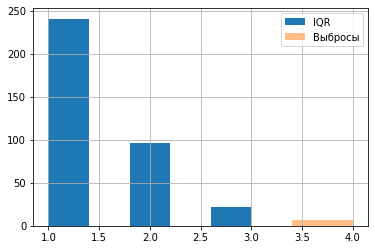

In [113]:
stud.traveltime.describe()
pd.DataFrame(stud.traveltime.value_counts())
check_outs('traveltime',stud)

##### Соответсвует заявленному требованию анкеты -  
"1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин"
Пропуски возможно заполнить в зависимости от поля Adress . Если U  - 2 , R -3   
Не думаю что в данном случае нужно отсеивать выбросы.

# studytime

count    387.000000
mean       2.041344
std        0.841505
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

,studytime
2.0,194
1.0,102
3.0,64
4.0,27


25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


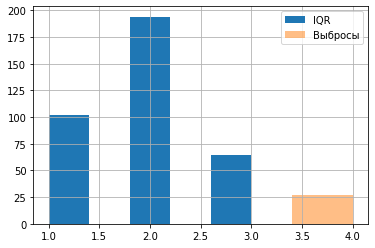

In [115]:
stud.studytime.describe()
pd.DataFrame(stud.studytime.value_counts())
check_outs('studytime',stud)

##### Соответсвует заявленному требованию анкеты -  
"1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов"
Есть пропуски. Не вижу вариантов для заполнения.
Не думаю, что в данном случае нужно отсеивать выбросы.

# failures

count    372.000000
mean       0.330645
std        0.731152
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

,failures
0.0,293
1.0,49
2.0,16
3.0,14


25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


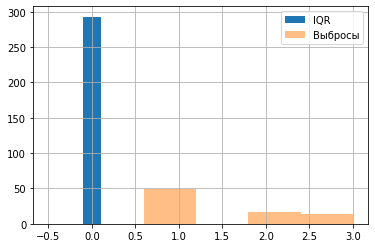

In [117]:
stud.failures.describe()
pd.DataFrame(stud.failures.value_counts())
check_outs('failures',stud)

##### Соответсвует заявленному требованию анкеты -  
"n, если 1<=n<=3, иначе 0"
Есть пропуски. Не вижу вариантов для заполнения.
Не думаю, что в данном случае нужно отсеивать выбросы.

# schoolsup

In [119]:
stud.schoolsup.describe()
pd.DataFrame(stud.schoolsup.value_counts())

count     385
unique      2
top        no
freq      334
Name: schoolsup, dtype: object

,schoolsup
no,334
yes,51


##### Соответсвует заявленному требованию анкеты -  
"дополнительная образовательная поддержка (yes или no)  
Есть пропуски.Заполнить нет возможности.

# famsup

In [120]:
stud.famsup.describe()
pd.DataFrame(stud.famsup.value_counts())

count     355
unique      2
top       yes
freq      219
Name: famsup, dtype: object

,famsup
yes,219
no,136


##### Соответсвует заявленному требованию анкеты -  
" семейная образовательная поддержка (yes или no)"  
Есть пропуски. Заполнить нет возможности.

# paid

In [121]:
stud.paid.describe()
pd.DataFrame(stud.paid.value_counts())

count     354
unique      2
top        no
freq      199
Name: paid, dtype: object

,paid
no,199
yes,155


##### Соответсвует заявленному требованию анкеты -  
"дополнительные платные занятия по математике (yes или no)"  
Есть пропуски. Заполнить нет возможности.

# activities

In [123]:
stud.activities.describe()
pd.DataFrame(stud.activities.value_counts())

count     380
unique      2
top       yes
freq      195
Name: activities, dtype: object

,activities
yes,195
no,185


##### Соответсвует заявленному требованию анкеты -  
"дополнительные внеучебные занятия (yes или no)"  
Есть пропуски. Заполнить нет возможности.

# nursery

In [124]:
stud.nursery.describe()
pd.DataFrame(stud.nursery.value_counts())

count     378
unique      2
top       yes
freq      300
Name: nursery, dtype: object

,nursery
yes,300
no,78


##### Соответсвует заявленному требованию анкеты -  
"посещал детский сад (yes или no)"  
Есть пропуски. Заполнить нет возможности.

# studytime, granular

count    387.000000
mean      -6.124031
std        2.524515
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

,"studytime, granular"
-6.0,194
-3.0,102
-9.0,64
-12.0,27


25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


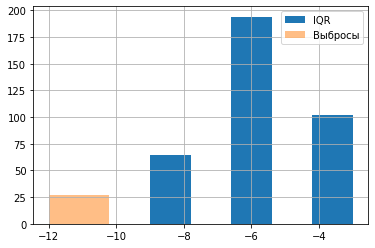

In [126]:
stud['studytime, granular'].describe()
pd.DataFrame(stud['studytime, granular'].value_counts())
check_outs('studytime, granular',stud)

##### переменная без описания. Вероятно всего  вспомогательный столбец и высчитвается из имеющихся данных датафрейма.
Есть пропуски.Требует отдельного рассмотения в дальнейшем.

# higher

In [129]:
stud.higher.describe()
pd.DataFrame(stud.higher.value_counts())

count     374
unique      2
top       yes
freq      356
Name: higher, dtype: object

,higher
yes,356
no,18


##### Соответсвует заявленному требованию анкеты -  
"хочет получить высшее образование (yes или no)  
Есть пропуски. Заполнить нет возможности.

# internet

In [130]:
stud.internet.describe()
pd.DataFrame(stud.internet.value_counts())

count     360
unique      2
top       yes
freq      304
Name: internet, dtype: object

,internet
yes,304
no,56


##### Соответсвует заявленному требованию анкеты -  
"наличие интернета дома (yes или no)"  
Есть пропуски. Заполнить нет возможности.

# romantic

In [132]:
stud.romantic.describe()
pd.DataFrame(stud.romantic.value_counts())

count     363
unique      2
top        no
freq      240
Name: romantic, dtype: object

,romantic
no,240
yes,123


##### Соответсвует заявленному требованию анкеты -  
"в романтических отношениях (yes или no)"  
Есть пропуски. Заполнить нет возможности.

# famrel

count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

,famrel
4.0,182
5.0,98
3.0,62
2.0,17
1.0,7
-1.0,1


25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


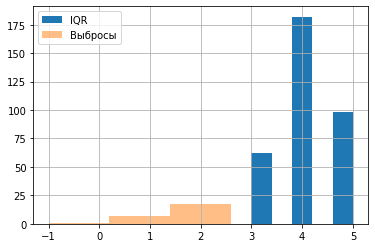

In [138]:
stud.famrel.describe()
pd.DataFrame(stud.famrel.value_counts())
check_outs('famrel',stud)

##### Соответсвует заявленному требованию анкеты -  
"семейные отношения (от 1 - очень плохо до 5 - очень хорошо)"
Есть аномалия в виде значения -1 , высокая веротяность что послужил человеческий фактор. Меняем на 1.


In [147]:
stud.famrel = stud.famrel.apply(lambda x: 1 if x == -1)

SyntaxError: invalid syntax (<ipython-input-147-cec4c71d9425>, line 1)

# freetime

count    383.000000
mean       3.229765
std        0.994462
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

,freetime
3.0,153
4.0,111
2.0,63
5.0,38
1.0,18


25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


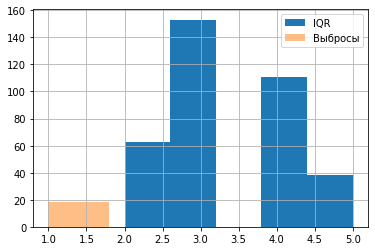

In [150]:
stud.freetime.describe()
pd.DataFrame(stud.freetime.value_counts())
check_outs('freetime',stud)

##### Соответсвует заявленному требованию анкеты -  
"свободное время после школы (от 1 - очень мало до 5 - очень мого)"
Есть пропуски. Заполнить можно по моде.

# goout

count    386.000000
mean       3.101036
std        1.113156
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

,goout
3.0,127
2.0,101
4.0,84
5.0,51
1.0,23


25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


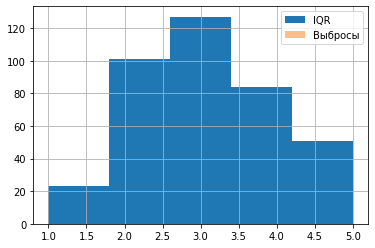

In [151]:
stud.goout.describe()
pd.DataFrame(stud.goout.value_counts())
check_outs('goout',stud)

##### Соответсвует заявленному требованию анкеты -  
"проведение времени с друзьями (от 1 - очень мало до 5 - очень много)"
Есть пропуски. Заполнить можно по моде. Выбросов нет.

# health

count    379.000000
mean       3.538259
std        1.391770
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

,health
5.0,138
3.0,89
4.0,63
1.0,46
2.0,43


25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


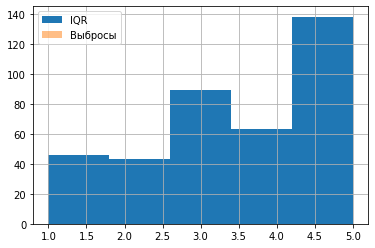

In [152]:
stud.health.describe()
pd.DataFrame(stud.health.value_counts())
check_outs('health',stud)

##### Соответсвует заявленному требованию анкеты -  
"текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
Есть пропуски. Заполнить можно по моде. Выбросов нет.

# absences

count    365.000000
mean       4.572603
std        4.936221
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,6


25-й перцентиль: 0.0, 75-й перцентиль: 7.0, IQR: 7.0,  Границы выбросов: [-10.5, 17.5].


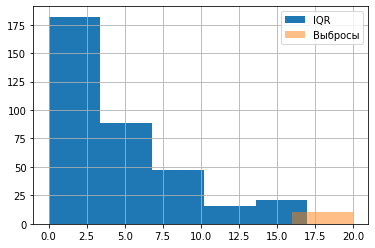

In [155]:
stud.absences.describe()
pd.DataFrame(stud.absences.value_counts())
check_outs('absences',stud)

##### Соответсвует заявленному требованию анкеты -  
"количество пропущенных занятий"

Есть пропуски. Заполнить можно по моде. Выбросы есть. Их нужно исключить.

In [154]:
stud = stud[stud.absences<=20]

# score

##### Соответсвует заявленному требованию анкеты -  
"баллы по госэкзамену по математике"

In [ ]:

for col in stud.columns:
    stud[col] = stud[col].apply(fix_values)

In [ ]:
#2
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [ ]:
#3
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

In [ ]:
#4 преобразование данных. Даты, числа, спец символы

In [5]:
#5
#sns.pairplot(stud, kind = 'reg')
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


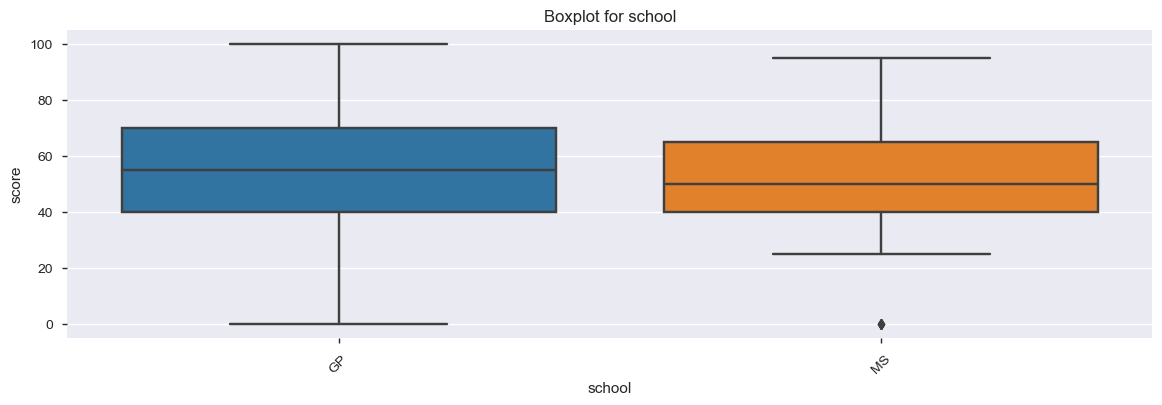

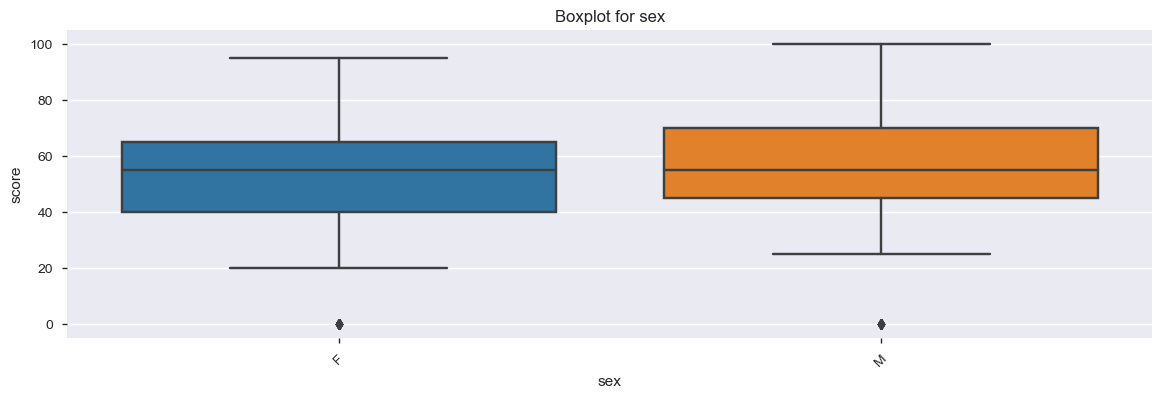

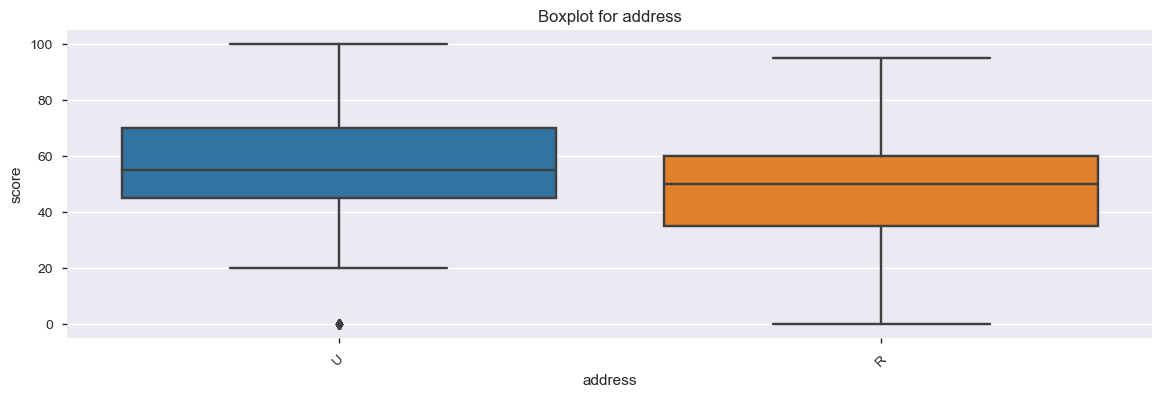

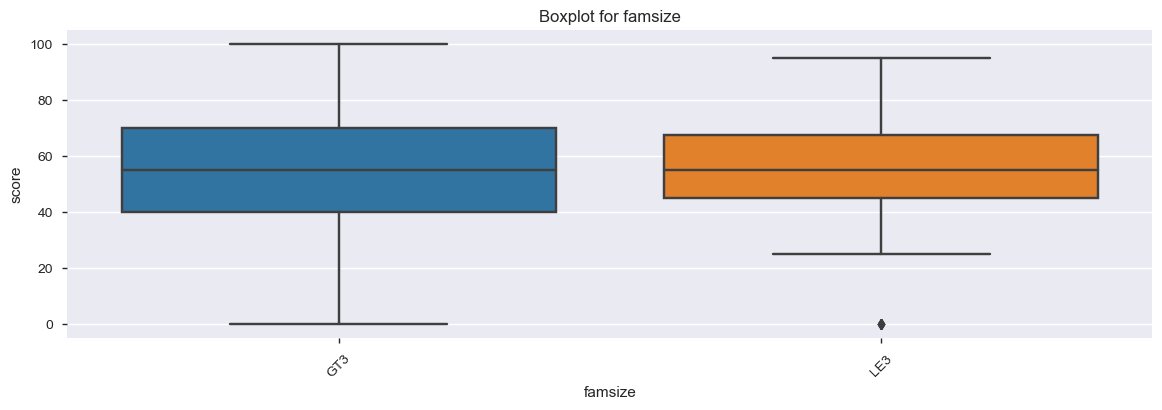

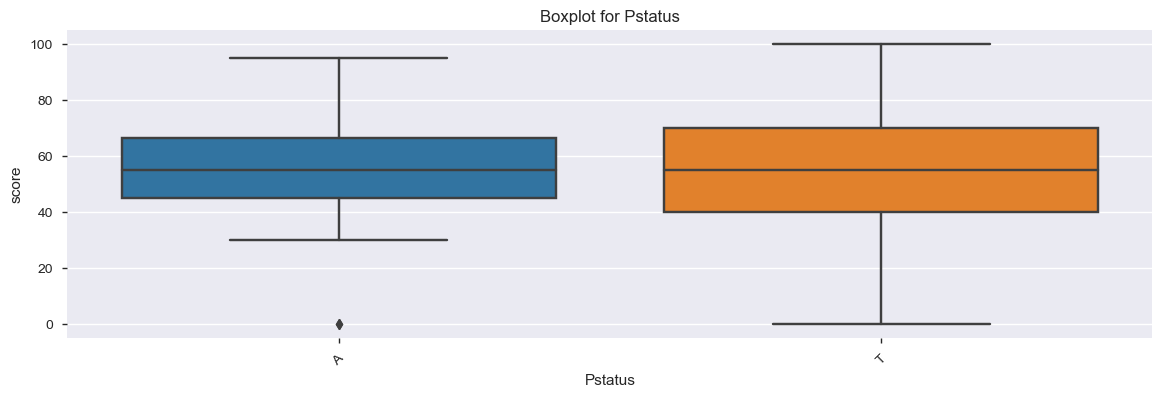

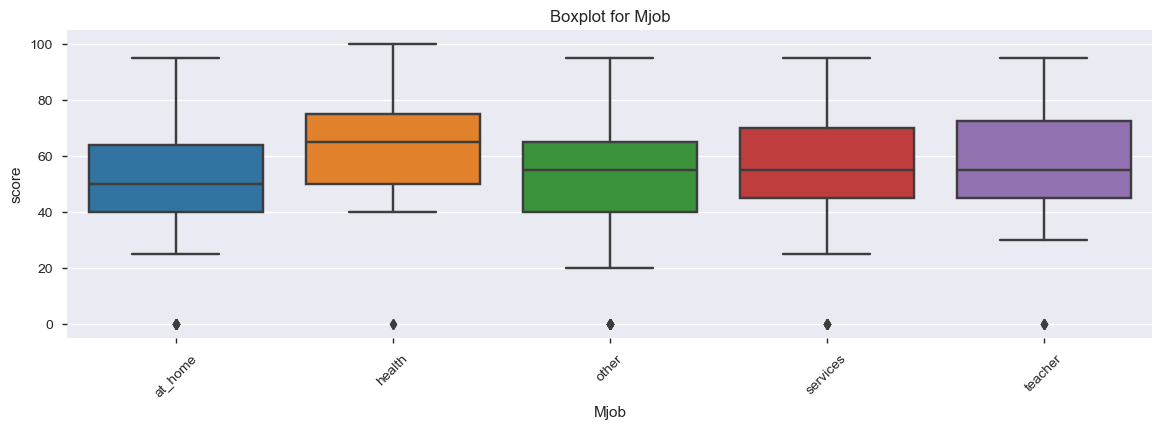

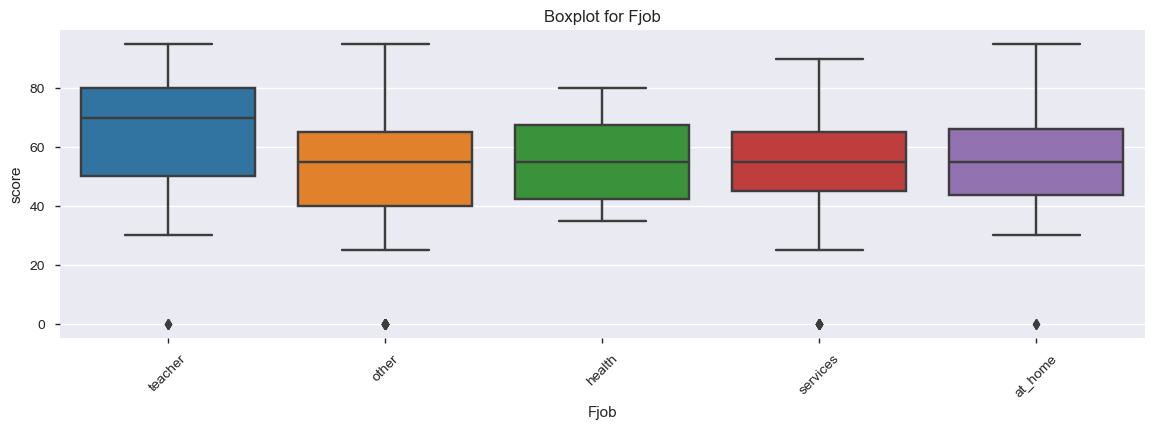

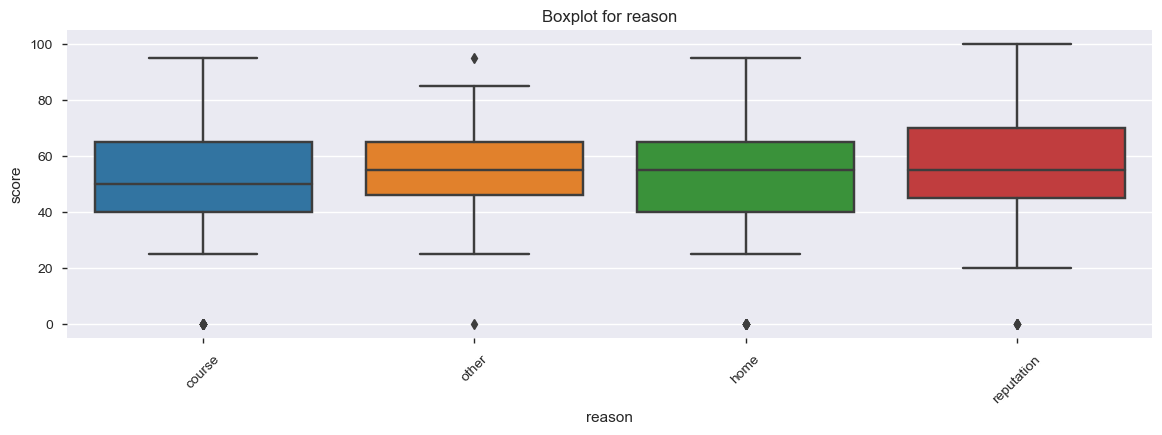

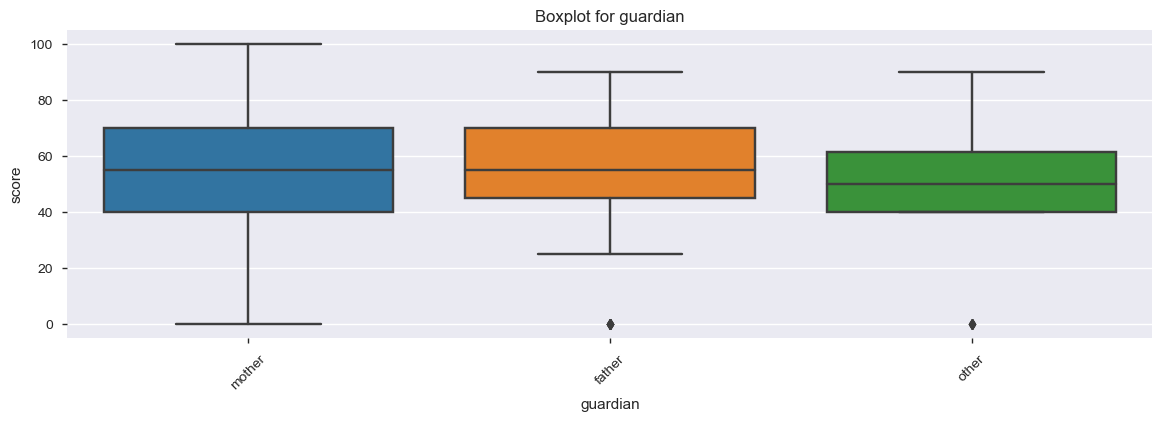

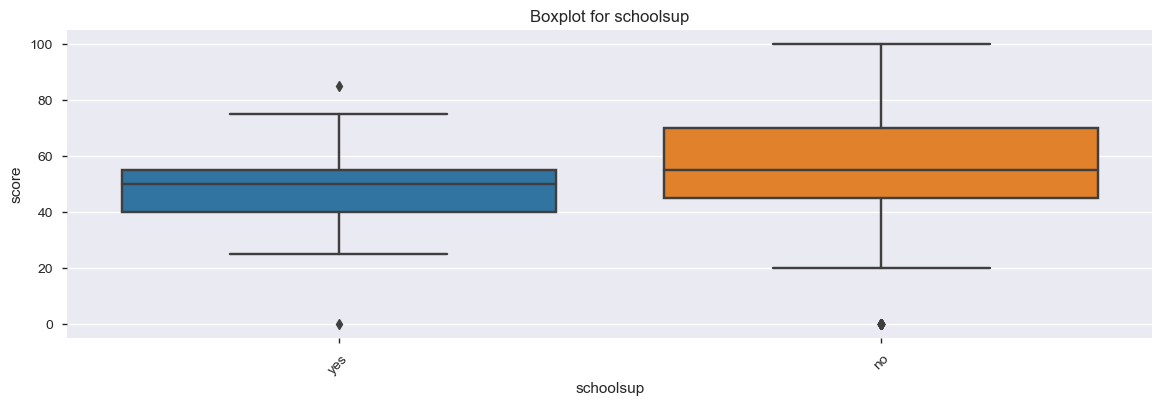

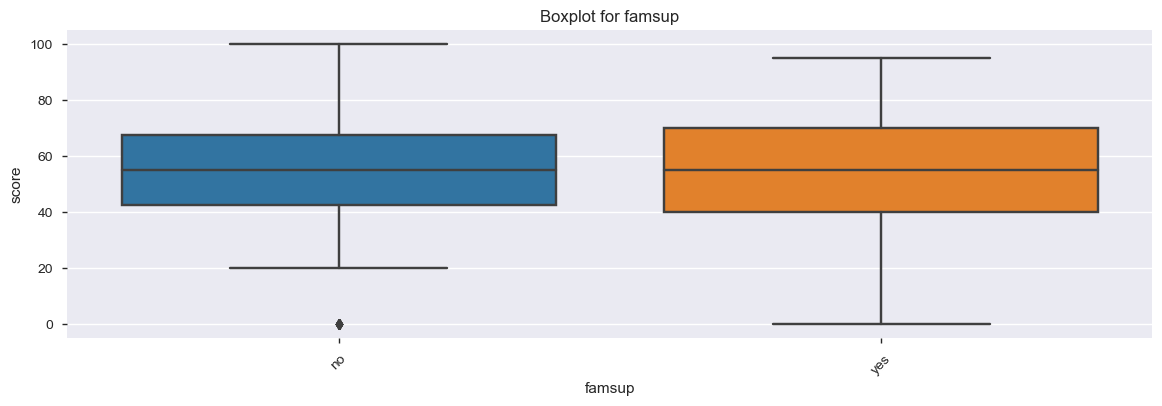

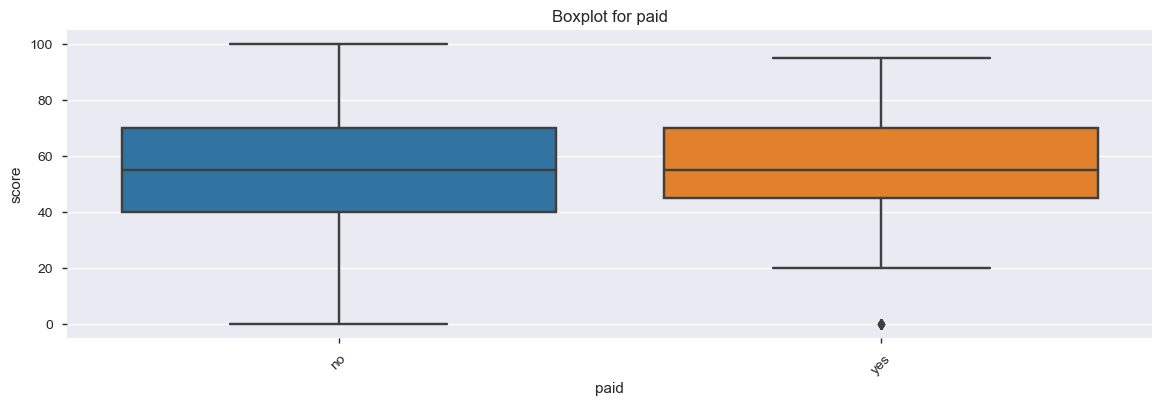

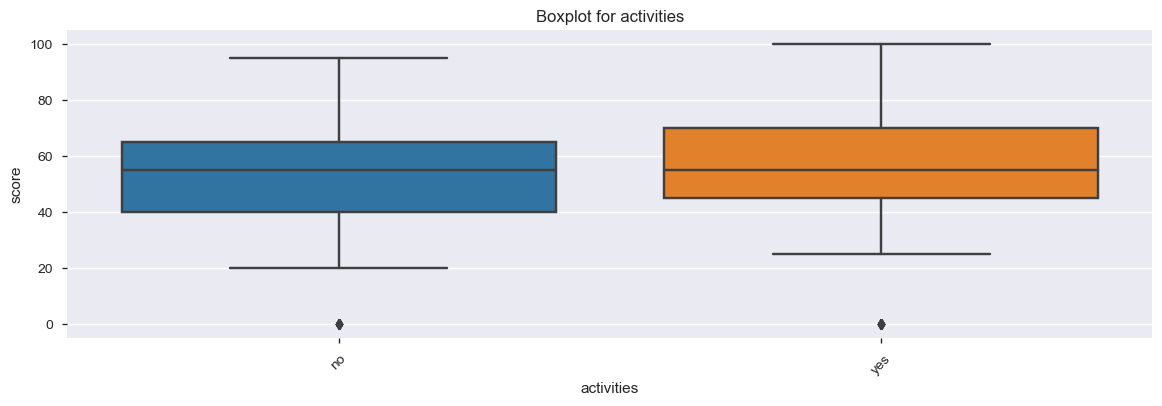

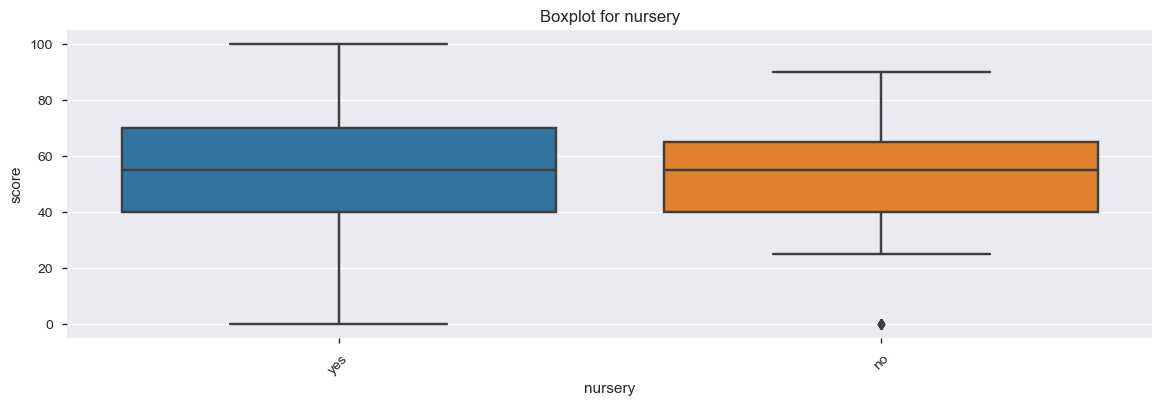

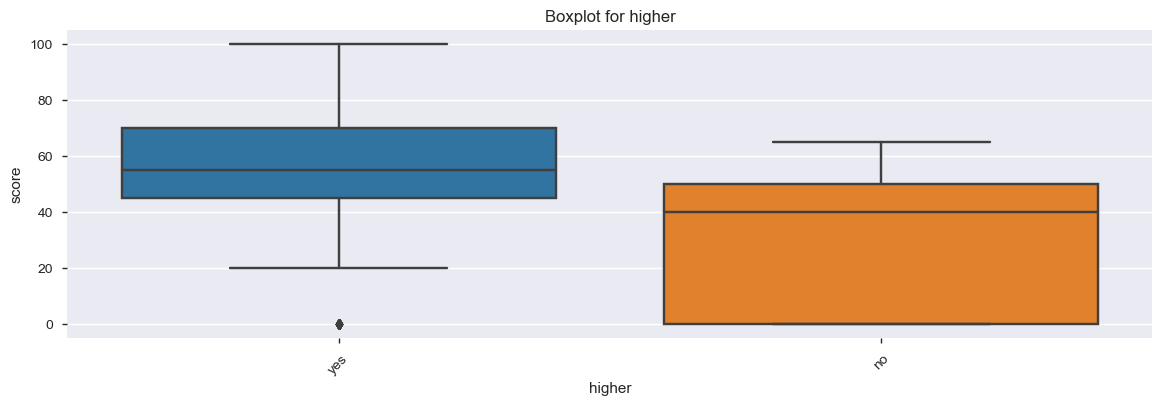

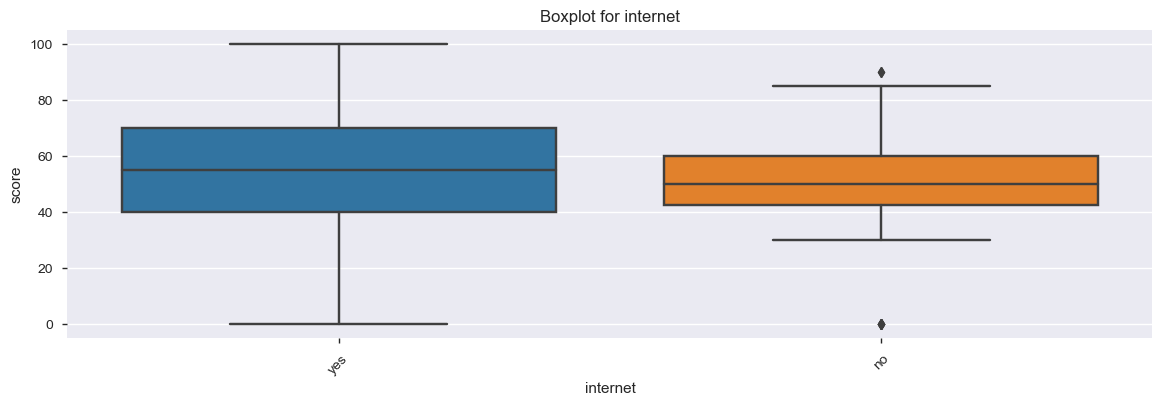

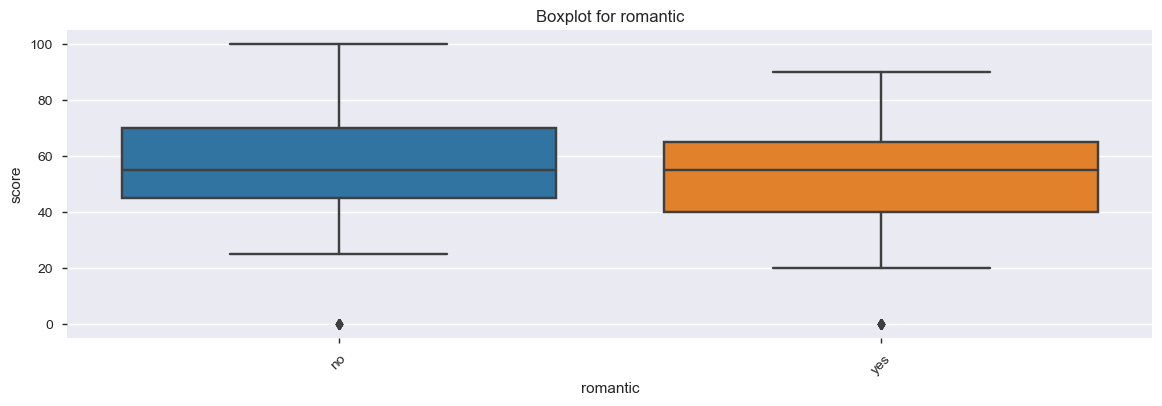

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [97]:
#7 Анализ номенативных переменных

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:16])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in categorial_cols:
    get_boxplot(col)
    
categorial_cols

In [99]:
#Распределение Стьюдента

def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

        
for col in categorial_cols:
    get_stat_dif(col)
    

Найдены статистически значимые различия для колонки Mjob


D:\DATA_SCIENCE\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
"""8 вывод

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, specific_origin, company_location, review_date и cocoa_percent.
""" 